### **$\color{red}{\textbf{Problem}}$**
  * Binary classification problem **0** means non-default candidates and **1** means default candidates.
  * We are provided following two datasets;
      * Dataset:
        * $\color{blue}{\textbf{model.csv}}$: To be used to develop/train the model.
        * $\color{blue}{\textbf{val.csv}}$: To be used to predict the probabilities of getting class label 1 given the feature value.
        
        
* Model.csv dataset has total 94000 entries, with 4000 for class 1 and 90000 for class 0.
* Dataset is highly imbalanced.
* Dataset has total 30 features.
* We have to predict the probability of each entry in val.csv to be of class 1.
* Result will be judged based on **AUC** score.

### $\color{blue}{\textbf{Summary of Assignment and final results:}}$

* **Train_test split for model.csv data:**
    * Before treating missing values and applying other feature engineering we perform a 90:10 train test split. 
    * Applying train test split before feature engineering and missing values treatment ensures prevention of data leakage.
    * train test split was done with random shuffling and stratifying on class outcome.
    * Stratify option is used as our data set is highly imbalanced so we made sure that the ratio of entries with two class labels is same    for train and test sample.
    

* **Missing Values and Preprocessing:**
    * For all 30 feature variables, a numeric value equal to zero was interpreted as missing value.
    * Missing values for each column were replaced by the median of non-zero values for that column.
    * The choice of median was motivated by the presence of large number of outliers for feature variables.
    * After replacing the missing values, we have used Robust scaler to scale the feature variables.
    * Again the choice of robust scaler was motivated by the presence of outliers in the dataset.
    
    
    

* **Machine Learning Models:**
    * We have used two different classification models: 1) Logistic Regression and 2) Decision Tree based classifier.
    * **Summary from Logistic Regression Model:**
        * Model :LogisticRegression(max_iter=1000,class_weight= {0:1, 1:10},C=0.01,penalty='l2',solver='liblinear')
        * Optimized values of hyper-parameters mentioned above was found using GridSearchCV
        * AUC score is 81.77%
        * Recall score is 52.33%
        * The model only predicts the class 1 correctly 52.33% times
        * Final prediction evaluated on val.csv for probability of belonging to class 1 was saved in results1.csv
    
    * **Results from Decision Tree Classifier:**
        * Model :DecisionTreeClassifier(criterion= 'gini', max_depth = 5, min_samples_leaf = 100)
        * Optimized values of hyper-parameters mentioned above was found using GridSearchCV
        * AUC score is 79.68%
        * Recall score is 0.0%
        * Final prediction evaluated on val.csv for probability of belonging to class 1 was saved in results2.csv

# **Loading libraries**

In [1]:
#importing basic libraries to be used for data analysis
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #data visualization
import matplotlib.pyplot as plt #data visualization


# **Loading dataset**

In [2]:
#loading the data into pandas dataframe named df_model from model.csv 
df_model  = pd.read_csv("/kaggle/input/home-assignwm/model_wm.csv")
df_valid = pd.read_csv("/kaggle/input/home-assignwm/val_wm.csv")


# **Inspecting the data**

In [3]:
#printing the summary statistics of our dataframe
df_model.describe()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A22,A23,A24,A25,A26,A27,A28,A29,A30,default
count,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,...,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000
mean,12.134211,83.838361,7319.620881,13449.501569,33.507640,36.983300,1.518232,124.108845,1.697824,1.407075,...,0.074435,0.008550,0.013537,0.133531,290.756534,357.976444,103.482568,28.847016,38.509910,0.042553
std,6.587858,8.672843,2652.539364,8197.452662,11.906865,14.209314,1.007398,33.130292,0.776810,0.652138,...,0.138356,0.020052,0.029078,0.156658,471.958770,597.594147,136.248095,62.759062,90.882963,0.201849
min,0.000000,20.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.010000,-0.020000,-0.020000,0.000000,-751.260000,-405.370000,-616.230000,-490.160000,-719.720000,0.000000
25%,7.670000,79.000000,5618.627500,8700.000000,26.880000,28.780000,0.820000,103.027500,1.272000,1.000000,...,0.010000,0.000000,0.000000,0.060000,0.000000,0.000000,14.970000,0.000000,0.000000,0.000000
50%,12.020000,84.360000,7285.590000,11862.650000,32.770000,35.940000,1.420000,127.240000,1.667000,1.399000,...,0.030000,0.000000,0.010000,0.090000,115.140000,102.265000,59.350000,10.500000,0.000000,0.000000
75%,16.080000,89.670000,8780.870000,15896.575000,39.100000,43.830000,2.020000,143.100000,2.064000,1.714000,...,0.080000,0.010000,0.010000,0.140000,380.142500,485.880000,140.952500,34.860000,49.862500,0.000000
max,62.710000,100.000000,26333.500000,170300.000000,146.000000,146.000000,18.670000,524.000000,44.000000,44.000000,...,5.300000,0.700000,1.690000,4.080000,15288.660000,19503.760000,3265.980000,6561.930000,13487.000000,1.000000


In [4]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94000 entries, 0 to 93999
Data columns (total 31 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   A1       94000 non-null  float64
 1   A2       94000 non-null  float64
 2   A3       94000 non-null  float64
 3   A4       94000 non-null  float64
 4   A5       94000 non-null  float64
 5   A6       94000 non-null  float64
 6   A7       94000 non-null  float64
 7   A8       94000 non-null  float64
 8   A9       94000 non-null  float64
 9   A10      94000 non-null  float64
 10  A11      94000 non-null  float64
 11  A12      94000 non-null  float64
 12  A13      94000 non-null  float64
 13  A14      94000 non-null  float64
 14  A15      94000 non-null  float64
 15  A16      94000 non-null  float64
 16  A17      94000 non-null  float64
 17  A18      94000 non-null  float64
 18  A19      94000 non-null  float64
 19  A20      94000 non-null  float64
 20  A21      94000 non-null  int64  
 21  A22      940

* There are a total of 30 feature variables A1-A30 and one target variable named **default**.
* All variables have numeric (int/float) data type.
* There are no **NaN** values in any feature variables (but that doesn't mean there are no missing values).

# **EDA**

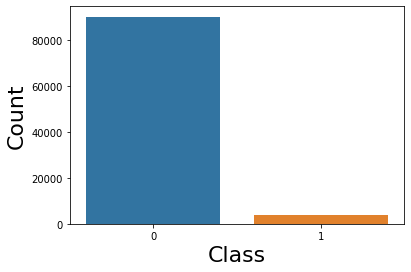

In [5]:
fig, ax = plt.subplots(figsize=(6,4))
b = sns.countplot(x=df_model["default"])
b.set_xlabel('Class',fontsize=22)
b.set_ylabel('Count',fontsize=22)
plt.show()

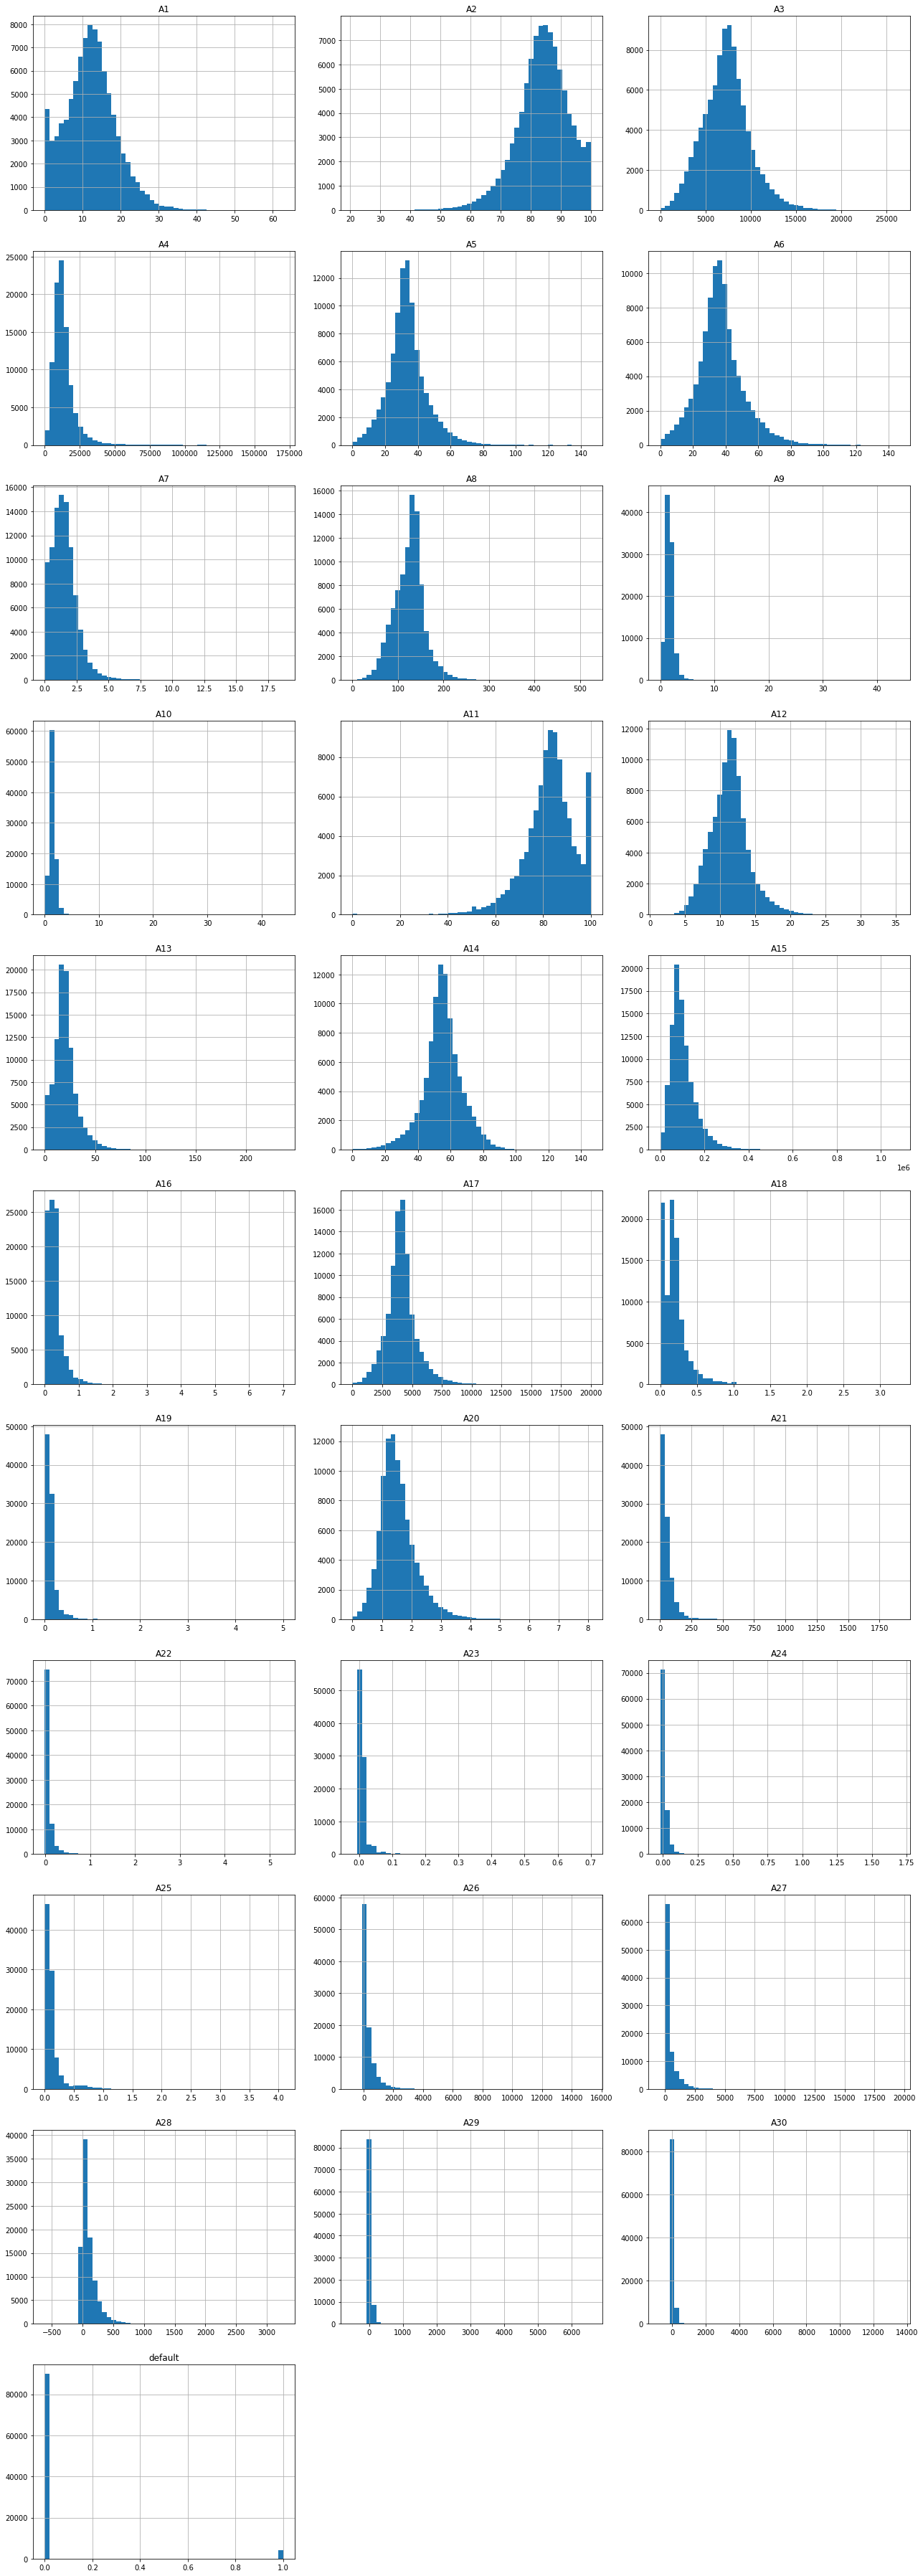

In [6]:
#plotting histogram for each 
df_model.hist(figsize=(18,50),bins=50,layout=(11,3))
plt.tight_layout()
plt.show()    

In [7]:
# finding the percetage of entries with default =1 
print('percentage of entries with default equal to 1 are ',round((df_model[df_model.default==1].size/df_model.size)*100,2),'%')

percentage of entries with default equal to 1 are  4.26 %


## Check outliers in dataset

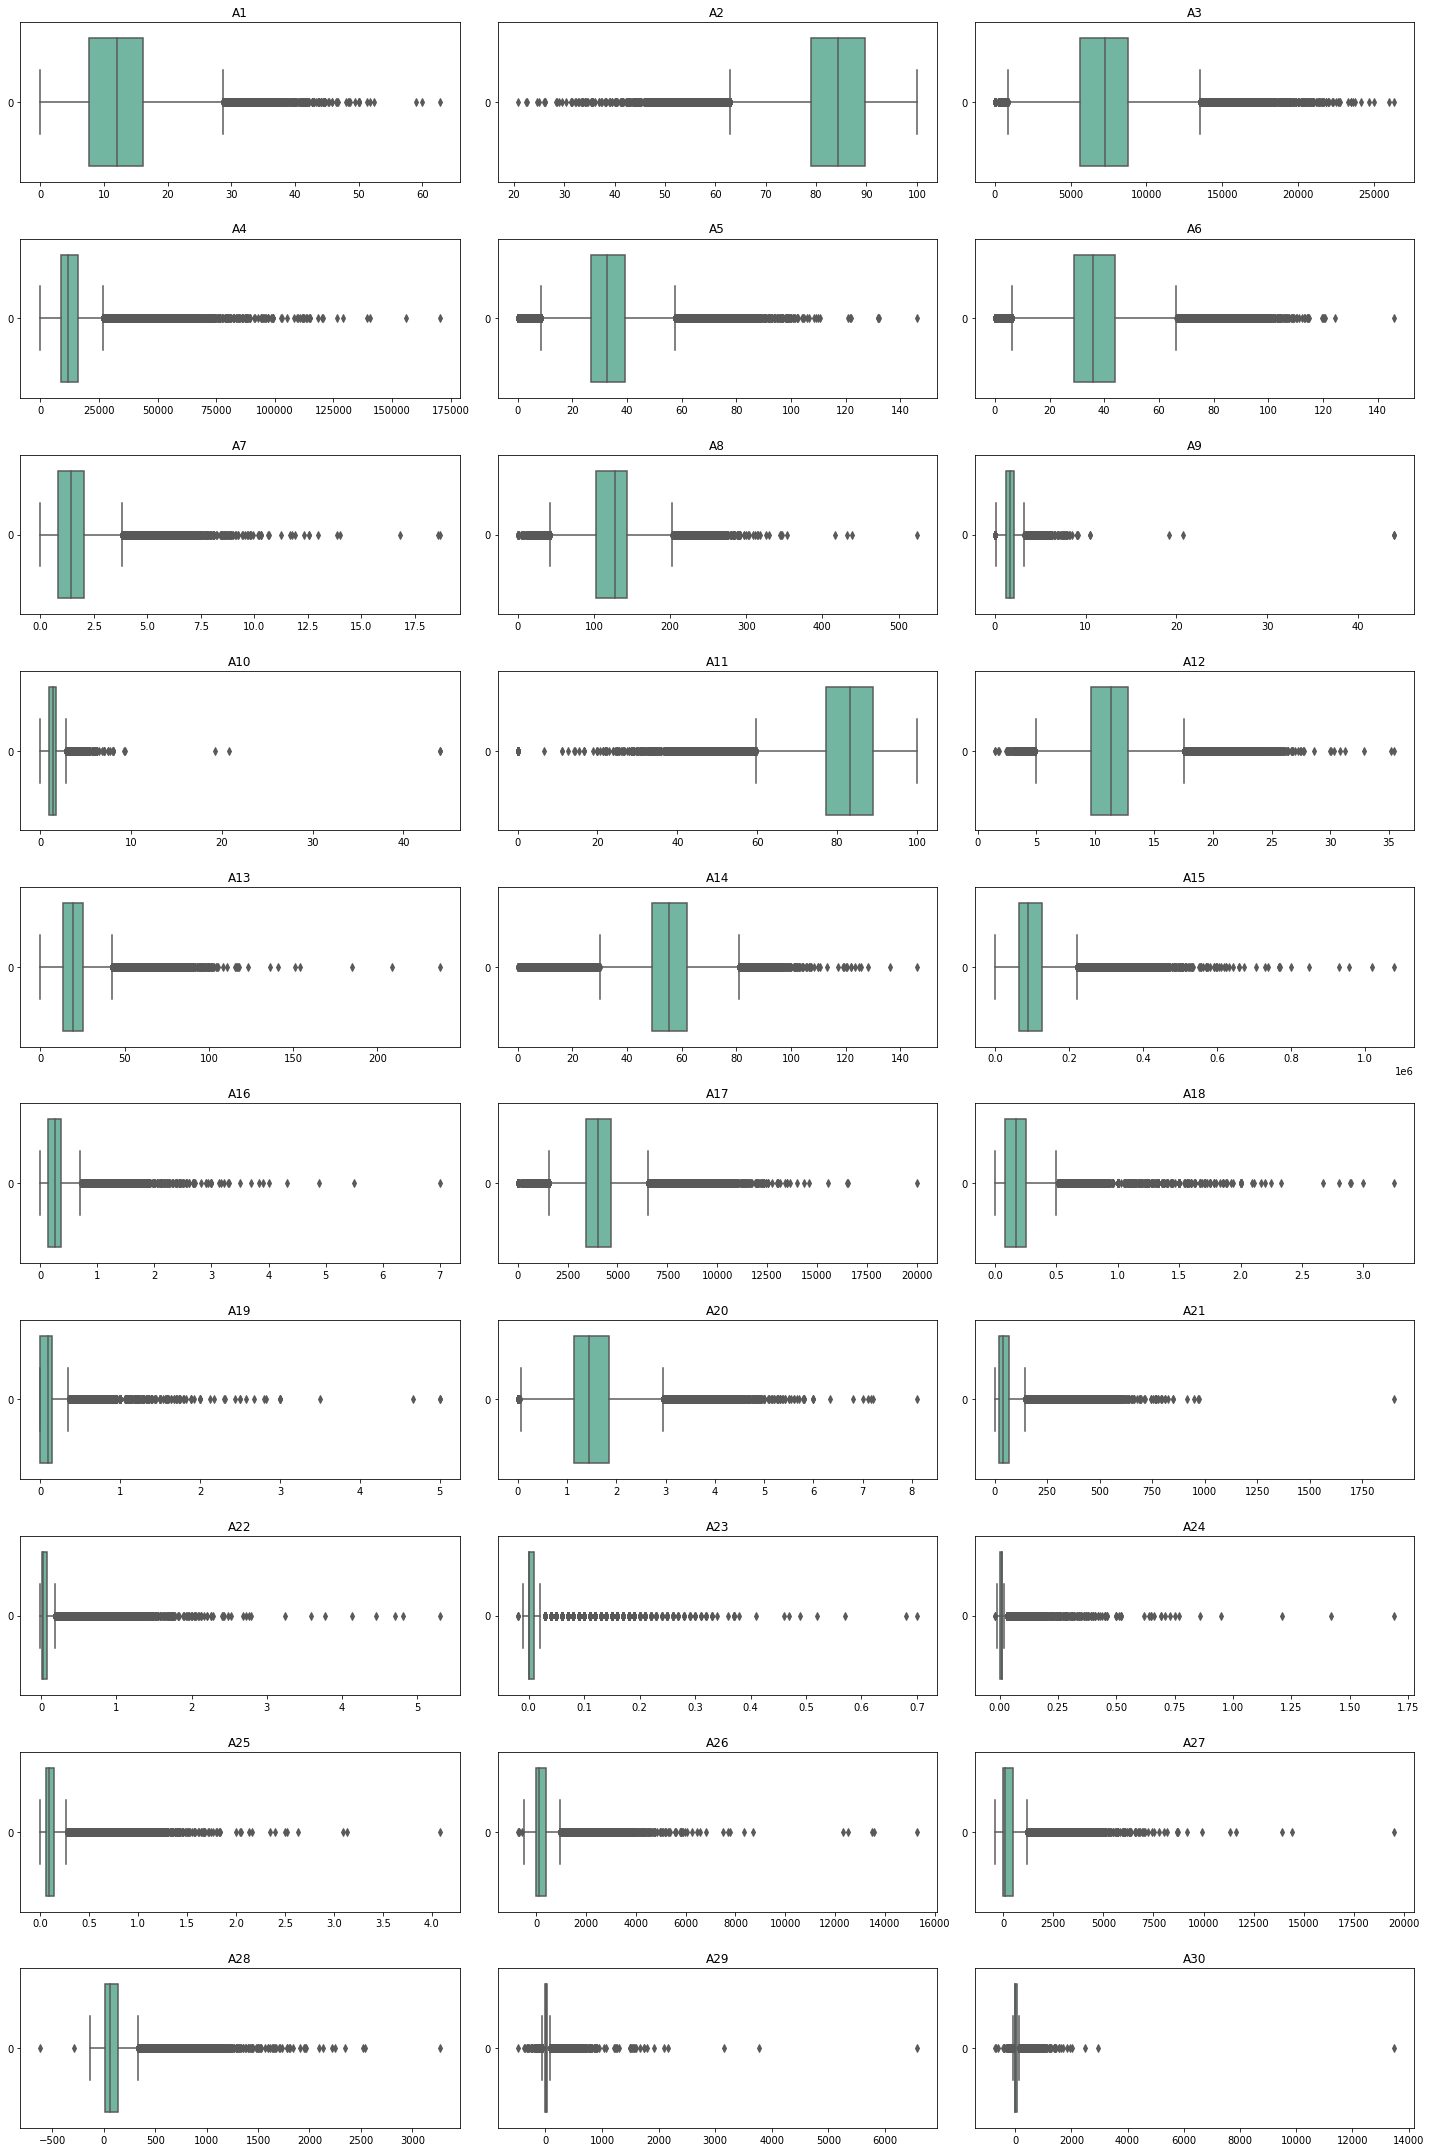

In [8]:
# we can make box plot to clearly see the outliers evident from above distributions
fig,ax = plt.subplots(10,3,figsize=(20,30))
ax = ax.ravel()

for i in range(30):
    sns.boxplot(ax=ax[i],data=df_model.iloc[:,i], palette="Set2",orient='h')
    ax[i].set_title(str(df_model.columns[i]))

plt.tight_layout()

### **Conclusion from above plot:**
* The dataset is highly imbalanced, only around 2% entries of total dataset corresponds to default =1 i.e. customer is default.
* Feature variables A21-A30 have very wide distribution and potential wide spread outliers, as evident from the box plots above.

* Next we plot histograms for all the feature variables, separting the target = default (red color) , target = not default (blue color).
* This is to see what feature variables provides a good separation in the target variables.

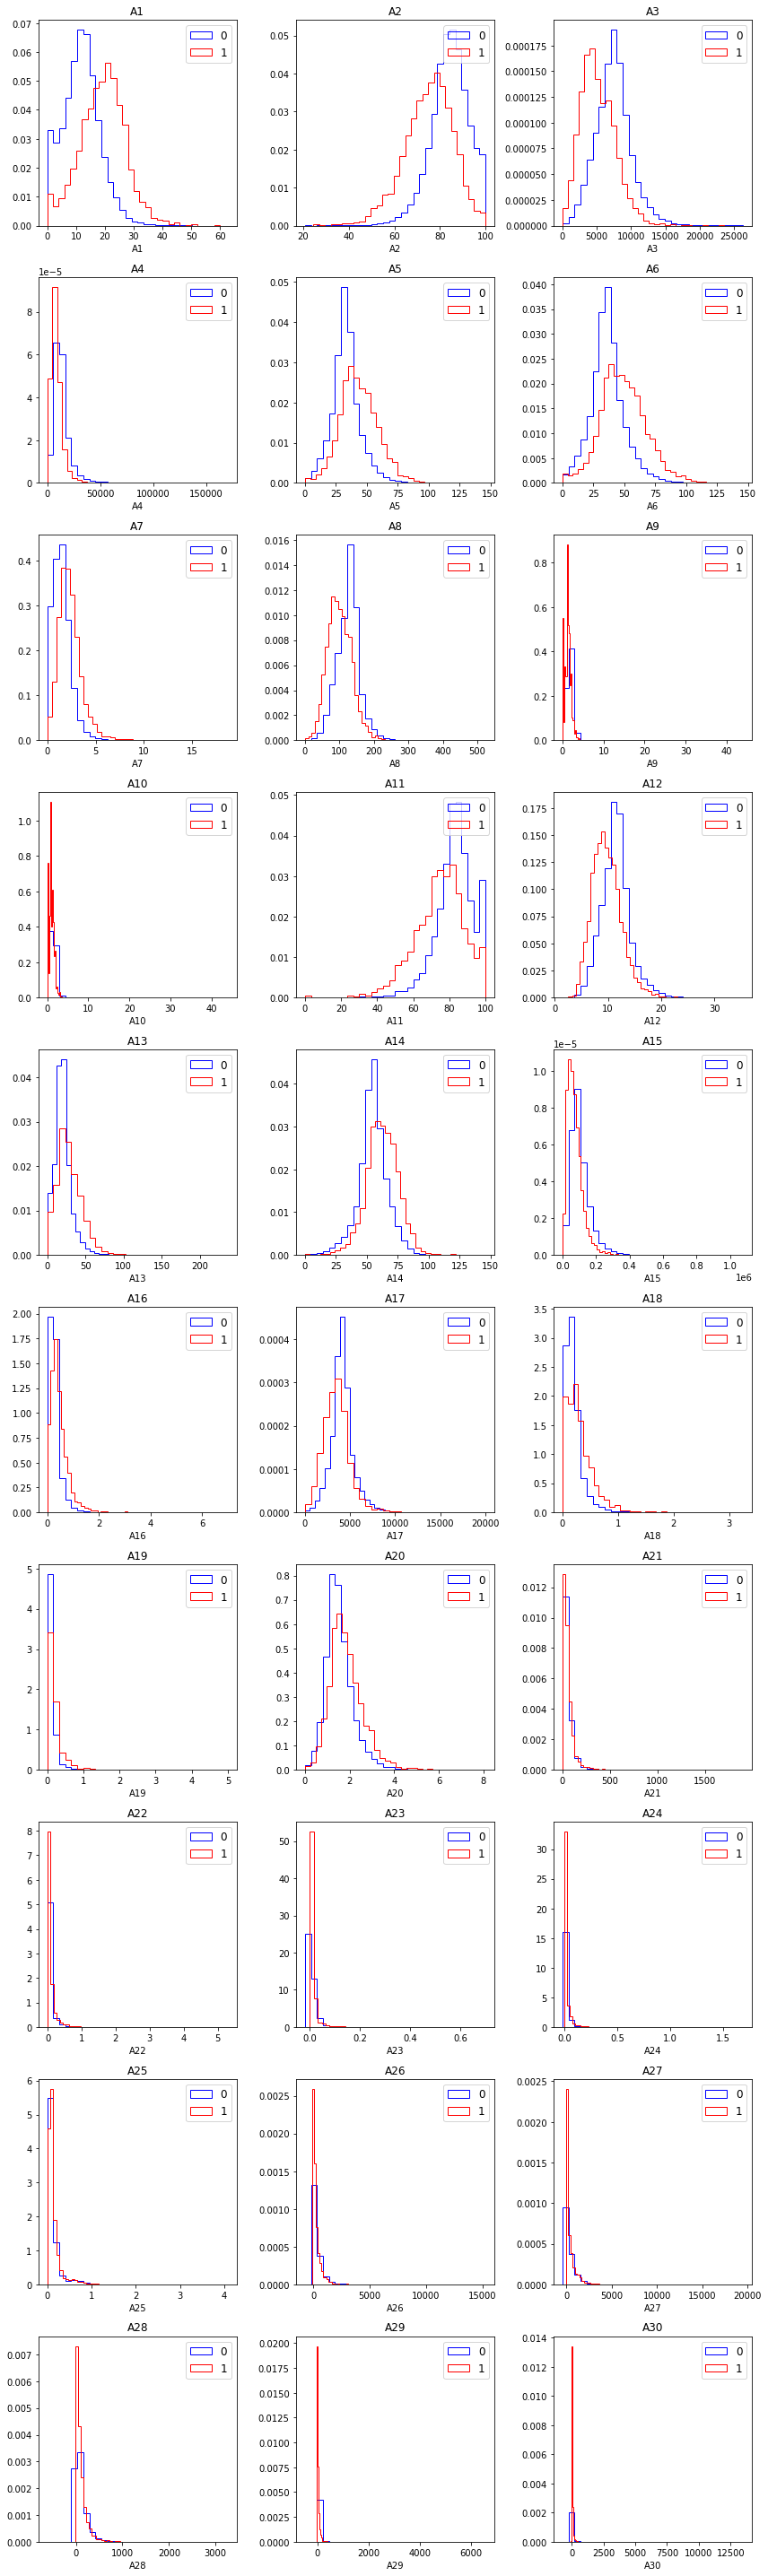

In [9]:
col_list = list(df_model.columns)

fig,ax = plt.subplots(10,3,figsize=(12,40))
a=0
ax = ax.ravel()
for i in range(30):
    ax[i].hist(df_model[df_model['default']==0][col_list[a]],label='0',bins=30,histtype='step',color='blue',density=True)
    ax[i].hist(df_model[df_model['default']==1][col_list[a]], label='1',bins=30,histtype='step',color='red',density=True)
    ax[i].set_xlabel(col_list[a])
    ax[i].set_title(col_list[a])
    ax[i].legend(fontsize='large')
    a=a+1    
plt.tight_layout()
plt.savefig('hist_outcome_all.jpg')

### Plotting the above histograms in log-scale to get a better idea about the outliers

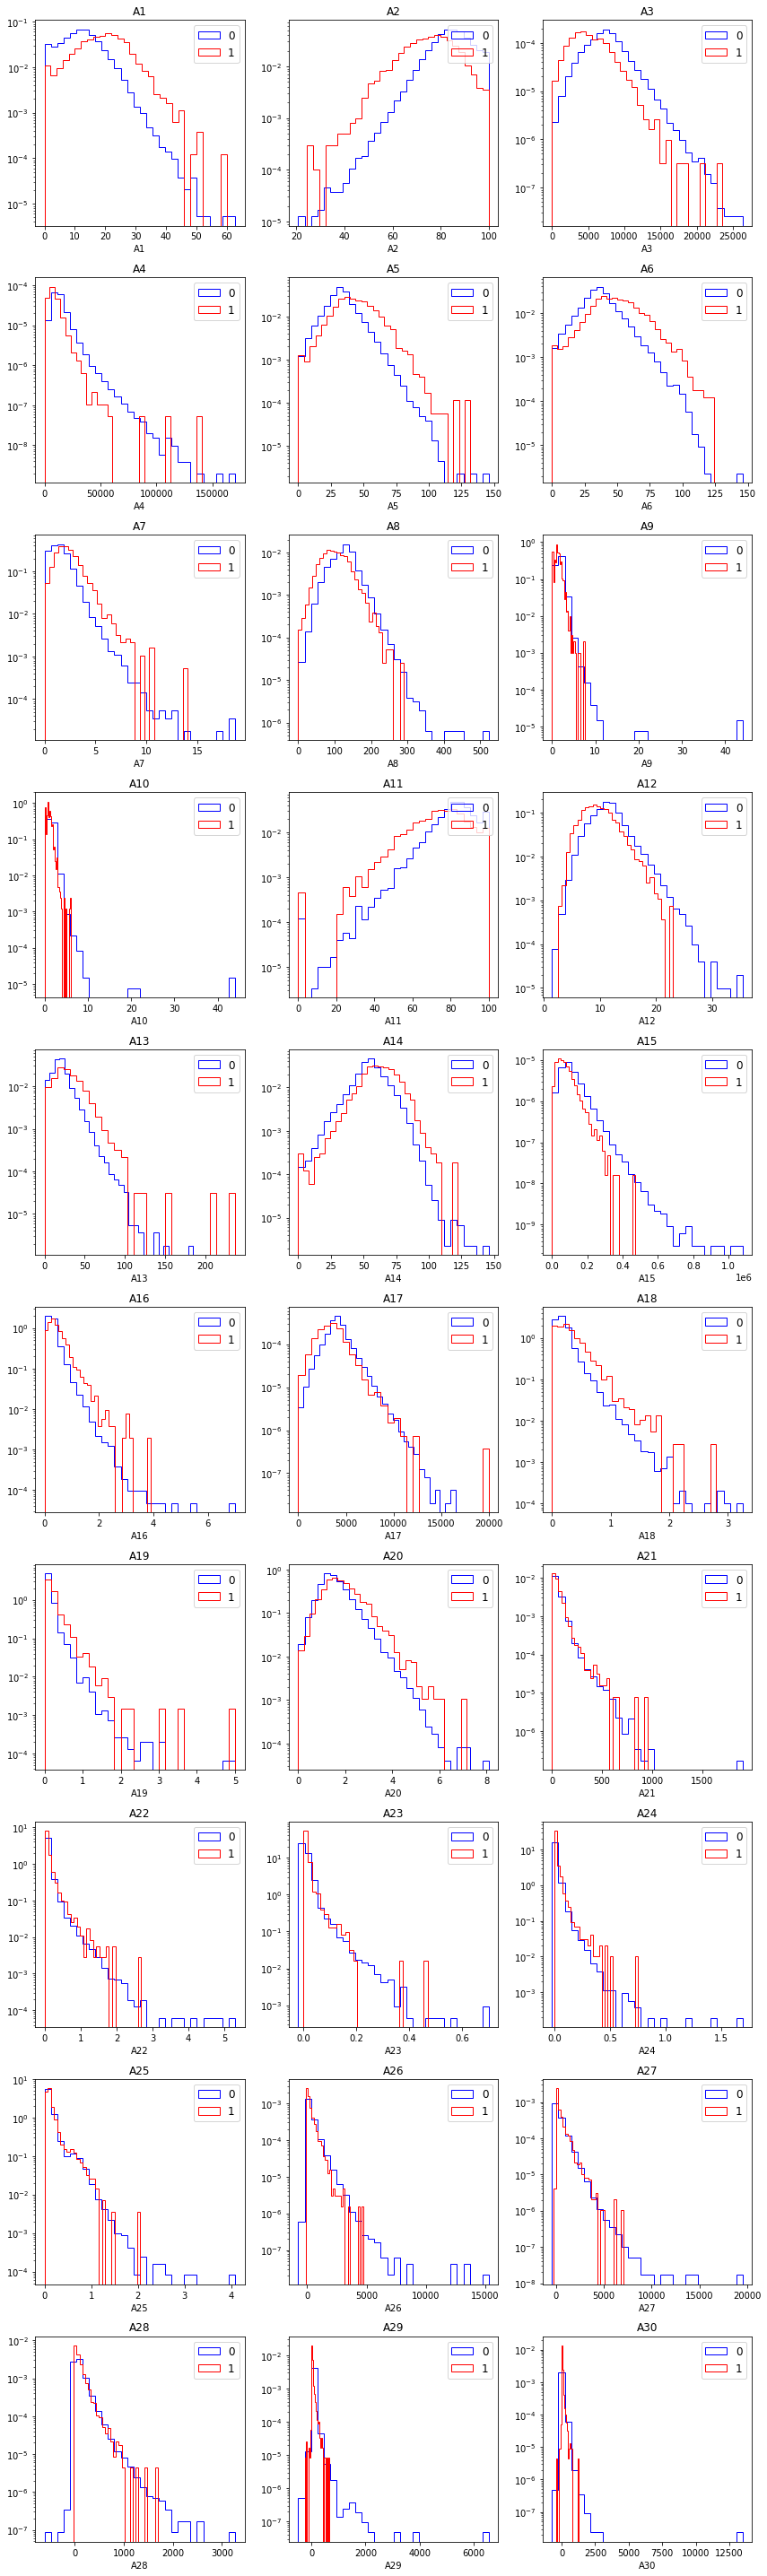

In [10]:
#plotting in log scale to get a better idea about the outliers
col_list = list(df_model.columns)

fig,ax = plt.subplots(10,3,figsize=(12,40))
a=0
ax = ax.ravel()
for i in range(30):
    ax[i].hist(df_model[df_model['default']==0][col_list[a]],label='0',bins=30,histtype='step',color='blue',density=True)
    ax[i].hist(df_model[df_model['default']==1][col_list[a]], label='1',bins=30,histtype='step',color='red',density=True)
    ax[i].set_xlabel(col_list[a])
    ax[i].set_title(col_list[a])
    ax[i].legend(fontsize='large')
    ax[i].set_yscale('log')
    a=a+1    
plt.tight_layout()
plt.savefig('hist_outcome_all_log.jpg')

### **Missing Values:**
* We were told that there are several entries where values were deleted to simulate the dirty data.
* How do we know how to interpret a values as missing given we don't know anything about features, there are no obvious NaN annotations ?
* For the following studies we will consider the zero values as missing
* Let's study the missing values in details


In [11]:
#dataframe containing only the feature variables
df_model_X =df_model.drop('default',axis=1)

# list of feature names
col_x = list(df_model_X.columns)

# write a function to check the missing values indicated by zero for the dataframe
def check_missing(df,outcome):
    '''
    function input dataframe and name of target variable ('default' in our case)
    prints the total percentage of missing values and also the percentage for each target class separately
    '''
    df_X_tot = df_model.drop(outcome,axis=1)
    df_X_0 = df_model[df_model[outcome]==0].drop(outcome,axis=1)  # if default =0
    df_X_1 = df_model[df_model[outcome]==1].drop(outcome,axis=1)  # if default=1
    print(f"{'feature name': <15}{'Missing Values':<20}{'% missing values':<20}{'% missing values (default=0)':<30}{'% missing values (default=1)':<30}")
    for i in col_x:
        print(f"{i: <15}{(df_X_tot[i]==0).sum():<20}{(((df_X_tot[i]==0).sum())*100)/df_X_tot.shape[0]: <20.2f}{(((df_X_0[i]==0).sum())*100)/df_X_0.shape[0]: <30.2f}{(((df_X_1[i]==0).sum())*100)/df_X_1.shape[0]: <30.2f}")
        
        
def check_missing1(df):
    '''
    function input dataframe 
    prints the total percentage of missing values for each column
    '''
    df_X_tot = df
    print(f"{'feature name': <15}{'Missing Values':<20}{'% missing values':<20}")
    for i in col_x:
        print(f"{i: <15}{(df_X_tot[i]==0).sum():<20}{(((df_X_tot[i]==0).sum())*100)/df_X_tot.shape[0]: <20.2f}")

In [12]:
# printing the percent of missing (==0) values for all the feature variables in the dataframe 
check_missing(df_model,'default')

feature name   Missing Values      % missing values    % missing values (default=0)  % missing values (default=1)  
A1             2326                2.47                2.52                          1.40                          
A2             0                   0.00                0.00                          0.00                          
A3             51                  0.05                0.05                          0.23                          
A4             13                  0.01                0.01                          0.07                          
A5             31                  0.03                0.03                          0.15                          
A6             88                  0.09                0.08                          0.38                          
A7             2138                2.27                2.36                          0.28                          
A8             14                  0.01                0.01             

### **Conclusion:**
* A23, A24, A26, A27, A29, A30 all have more than 20% values as missing 
* The % of missing values are mostly comparable for the two target classes: 'default' and 'not-default'
* So the missing values are not biased towards a particular target class


### **Treating the missing values:**
* Given we have outliers in our dataset, we will replace these missing values with the median of non zero values 

In [13]:
# Let's separate the dataframe into feature and target
X_model=df_model.drop('default',axis=1)
y_model=df_model['default']

## **Data split strategy:**
* We split our model.csv data into train(90%) and test(10%) , we will further use validation sample to evaluate the performance.
* We expect to obtain a similar performance on the test and vaild.csv sample.
* After splitting we will replace the missing values in train sample using median, we will store the used median values in an array.
* For test and valid sample the missing values will be replace by the medians obtained from train sample ( prevent data leakage).

In [14]:
## splitting the X_model, y_model into train and test, we will use random shuffling 
## we will use stratify = TRUE as the data set is imbalanced, this will ensure that the 0 and class are proportionally distributed 
## among the train and test sample

from sklearn.model_selection import train_test_split
X_model_train, X_model_test, y_model_train, y_model_test = train_test_split(X_model, y_model,test_size=0.1,random_state=12,stratify=y_model)

### **Preprocessing and Imputing missing values**
* for the train set we will replace the zero values in each column with the median of non-zero values
* Then we will scale each feature variable using robust scaler transformation
* The choice of robust scaler transformation is motivated by the presence of outliers in our dataset
* It will replace the values by value = (value – median) / (p75 – p25)

### **Replacing the missing values with median for X_train**

In [15]:
#Replacing the zero values with median of non zero values for X_model_train
# col_x is the list with feature names
# median_x_list willl store the median values used to replace the zero entries
median_x_list=[]
#median_x_list_af=[]
for i in col_x:
    median_x_list.append(X_model_train[X_model_train[i]!=0][i].median()) 
    X_model_train.loc[X_model_train[i]==0, i] = X_model_train[X_model_train[i]!=0][i].median()
    
    #median_x_list_af.append(X_model_train[X_model_train[i]!=0][i].median())

In [16]:
# printing the list of median values used to replace missing values
print(median_x_list)

[12.2, 84.36, 7290.405000000001, 11861.11, 32.75, 35.93, 1.44, 127.27, 1.693, 1.42, 83.36, 11.34, 19.2, 55.18, 90828.65, 0.28, 4055.29, 0.2, 0.12, 1.45, 39.0, 0.04, 0.01, 0.01, 0.09, 246.37, 355.385, 76.97, 19.86, 56.63]


In [17]:
# Lets make sure all missing values are gone
check_missing1(X_model_train)

feature name   Missing Values      % missing values    
A1             0                   0.00                
A2             0                   0.00                
A3             0                   0.00                
A4             0                   0.00                
A5             0                   0.00                
A6             0                   0.00                
A7             0                   0.00                
A8             0                   0.00                
A9             0                   0.00                
A10            0                   0.00                
A11            0                   0.00                
A12            0                   0.00                
A13            0                   0.00                
A14            0                   0.00                
A15            0                   0.00                
A16            0                   0.00                
A17            0                   0.00         

### **Using robust scaler to scale the features variables**

In [18]:
### applying robust scaler after treating for missing values
from sklearn.preprocessing import RobustScaler
robust_scale = RobustScaler()
X_model_train = robust_scale.fit_transform(X_model_train)

In [19]:
# converting the array back to dataframe to check the summary statistics after transformation
X_model_train  = pd.DataFrame(X_model_train)
X_model_train.describe()


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,84600.000000,84600.000000,84600.000000,84600.000000,84600.000000,84600.000000,84600.000000,84600.000000,84600.000000,84600.000000,...,84600.000000,84600.000000,84600.000000,84600.000000,84600.000000,84600.000000,84600.000000,84600.000000,84600.000000,84600.000000
mean,0.029519,-0.048643,0.011834,0.222803,0.062611,0.071516,0.097188,-0.078076,0.091615,0.090911,...,0.293639,0.626598,0.004564,0.007839,0.545671,0.520574,0.591599,0.363163,0.570996,12.796041
std,0.800874,0.812160,0.838427,1.143310,0.973054,0.943830,0.862041,0.826691,0.955629,1.003253,...,1.134104,2.291056,0.018101,0.027466,1.958865,1.935487,2.331309,1.262327,2.330956,83.225173
min,-1.545223,-5.961575,-2.248166,-1.630475,-2.670762,-2.386000,-1.245614,-3.143464,-2.136240,-2.352014,...,-0.760000,-0.833333,-0.030000,-0.030000,-1.000000,-4.201467,-3.317185,-6.740568,-21.064326,-776.350000
25%,-0.507006,-0.502343,-0.526257,-0.437680,-0.479934,-0.475333,-0.491228,-0.603349,-0.490463,-0.485114,...,-0.400000,-0.333333,0.000000,0.000000,-0.375000,-0.414266,-0.435679,-0.380688,-0.382447,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.492994,0.497657,0.473743,0.562320,0.520066,0.524667,0.508772,0.396651,0.509537,0.514886,...,0.600000,0.666667,0.000000,0.000000,0.625000,0.585734,0.564321,0.619312,0.617553,0.000000
max,6.434395,1.465792,6.038023,22.058595,9.275184,7.338000,15.114035,9.915771,57.638965,74.570928,...,37.260000,87.666667,0.690000,1.680000,49.875000,66.067683,61.188227,31.009432,155.108312,13430.370000


### **Scaling and replacing missing values for test set**

In [20]:
## checking performance on the test set
## lets replace the missing values using median_x_list array obtained from train sample
iter_testl=0
for i in col_x:
    #median_x_list.append(X_model_train[X_model_train[i]!=0][i].median()) 
    X_model_test.loc[X_model_test[i]==0, i] = median_x_list[iter_testl]
    iter_testl=iter_testl+1


In [21]:
print(iter_testl)

30


In [22]:
## scaling using robust scaler
X_model_test = robust_scale.fit_transform(X_model_test)
X_model_test  = pd.DataFrame(X_model_test)

In [23]:
X_model_test.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,9400.000000,9.400000e+03,9.400000e+03,9.400000e+03,9400.000000,9400.000000,9400.000000,9.400000e+03,9400.000000,9400.000000,...,9400.000000,9400.000000,9400.000000,9400.000000,9400.000000,9400.000000,9400.000000,9400.000000,9400.000000,9400.000000
mean,0.034301,-5.283584e-02,1.085920e-02,2.024939e-01,0.053337,0.062768,0.099511,-7.326726e-02,0.077922,0.074374,...,0.298666,0.626738,0.004481,0.007904,0.547939,0.525271,0.582176,0.377046,0.635638,13.858688
std,0.796768,8.095295e-01,8.349234e-01,1.107793e+00,0.977318,0.935220,0.848432,8.228574e-01,1.038849,1.063545,...,1.116587,2.224776,0.016880,0.027281,1.942500,1.845907,2.352207,1.280308,3.820863,65.644988
min,-1.504359,-5.140144e+00,-2.172381e+00,-1.608310e+00,-2.642202,-2.362919,-1.253863,-2.998578e+00,-2.216661,-2.239369,...,-0.760000,-0.500000,-0.020000,-0.020000,-1.000000,-4.390687,-1.562318,-1.690947,-16.714934,-455.630000
25%,-0.506849,-5.137827e-01,-5.324234e-01,-4.553690e-01,-0.488685,-0.479947,-0.485651,-6.065533e-01,-0.514837,-0.517317,...,-0.380000,-0.333333,0.000000,0.000000,-0.375000,-0.390335,-0.416526,-0.370660,-0.372937,0.000000
50%,0.000000,6.583818e-16,1.421118e-16,1.251576e-16,0.000000,0.000000,0.000000,-1.757221e-16,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.493151,4.862173e-01,4.675766e-01,5.446310e-01,0.511315,0.520053,0.514349,3.934467e-01,0.485163,0.482683,...,0.620000,0.666667,0.000000,0.000000,0.625000,0.609665,0.583474,0.629340,0.627063,0.000000
max,4.872976,1.446838e+00,4.822130e+00,1.463868e+01,7.184506,5.554241,9.033113,7.717465e+00,27.253486,33.897413,...,16.160000,41.333333,0.320000,0.700000,37.500000,19.260436,77.644024,16.136127,269.887376,1370.870000


# **Building Models:**

## **1) Logistic regression**

In [24]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression(max_iter=1000)

# Fit logreg to the train set
logreg.fit(X_model_train,y_model_train)

LogisticRegression(max_iter=1000)

### Feature Importance

Feature: 0, Score: 0.60745
Feature: 1, Score: -0.19886
Feature: 2, Score: -0.12735
Feature: 3, Score: 0.01314
Feature: 4, Score: 0.13571
Feature: 5, Score: 0.02283
Feature: 6, Score: 0.09808
Feature: 7, Score: -0.25632
Feature: 8, Score: -0.01964
Feature: 9, Score: 0.03401
Feature: 10, Score: -0.02939
Feature: 11, Score: 0.06244
Feature: 12, Score: 0.02987
Feature: 13, Score: 0.07207
Feature: 14, Score: -0.36645
Feature: 15, Score: -0.08781
Feature: 16, Score: -0.00365
Feature: 17, Score: 0.11826
Feature: 18, Score: 0.03620
Feature: 19, Score: 0.08510
Feature: 20, Score: 0.08061
Feature: 21, Score: 0.01934
Feature: 22, Score: 0.00029
Feature: 23, Score: 0.02788
Feature: 24, Score: 0.00536
Feature: 25, Score: -0.04804
Feature: 26, Score: -0.02209
Feature: 27, Score: -0.01574
Feature: 28, Score: -0.00020
Feature: 29, Score: -0.00028


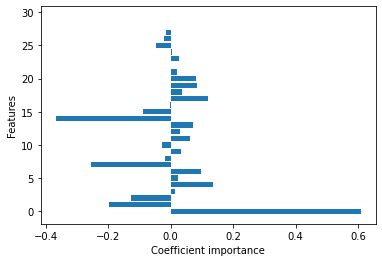

In [25]:
# get importance
importance = logreg.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.barh([x for x in range(len(importance))], importance)
plt.xlabel("Coefficient importance")
plt.ylabel("Features")
plt.show()

In [26]:
# Import confusion_matrix
from sklearn import metrics  

# Use logreg to predict instances from the train_set

# perdicting the class label 
y_pred_train = logreg.predict(X_model_train)

# to check what column correspond to which class use logreg.classses_
# predcting the class probabilities and keeping it only for class label 1 i.e. customer 'default' in our case
y_pred_proba_train = logreg.predict_proba(X_model_train)[:,1] 

print('AUC Score (Train):', round(metrics.roc_auc_score(y_model_train, y_pred_proba_train) * 100,2),'%')
print(f'Recall: {metrics.recall_score(y_model_train,y_pred_train)}') # very important for imbalanced dataset

AUC Score (Train): 81.73 %
Recall: 0.03194444444444444


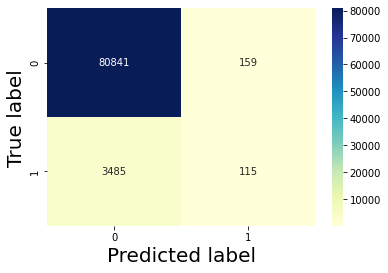

In [27]:
# draw the confusion matrix from logistic regression for train set
confusion_matrix = metrics.confusion_matrix(y_model_train, y_pred_train)
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu", fmt="g")
plt.ylabel('True label',fontsize=20)
plt.xlabel('Predicted label',fontsize=20)
plt.show()

### Very poor performance for class label 1  (train)
* out of total 3485+115 = 3600 class label 1 only  115 i.e. <5 % are correctly identified

AUC Score (Test): 81.41 %
Recall: 0.03194444444444444


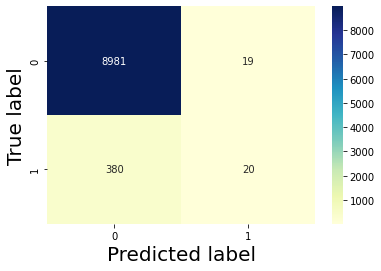

In [28]:
## prediction for test set
y_pred_test = logreg.predict(X_model_test)
y_pred_proba_test = logreg.predict_proba(X_model_test)[:,1] 
print('AUC Score (Test):', round(metrics.roc_auc_score(y_model_test, y_pred_proba_test) * 100,2),'%')

print(f'Recall: {metrics.recall_score(y_model_train,y_pred_train)}') # very important for imbalanced dataset


# draw the confusion matrix from logistic regression for test set
confusion_matrix = metrics.confusion_matrix(y_model_test, y_pred_test)
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu", fmt="g")
plt.ylabel('True label',fontsize=20)
plt.xlabel('Predicted label',fontsize=20)
plt.show()



### very poor performance for class label 1  (test)
* out of total 400 class label 1 only 20 i.e. 5% are correctly identified

In [29]:
## plotting the train and test roc curve
fpr_train, tpr_train, thresholds_train = metrics.roc_curve(y_model_train, y_pred_proba_train)
fpr_test, tpr_test, thresholds_test = metrics.roc_curve(y_model_test, y_pred_proba_test)

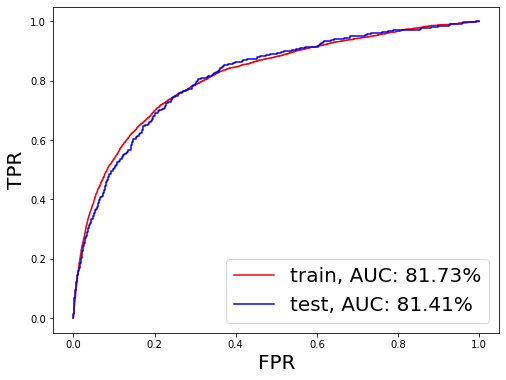

In [30]:
ts_label = round(metrics.roc_auc_score(y_model_test, y_pred_proba_test) * 100,2)
tr_label = round(metrics.roc_auc_score(y_model_train, y_pred_proba_train) * 100,2)

fig,ax = plt.subplots(figsize=(8,6))
plt.plot(fpr_train,tpr_train,color='red',label='train, AUC: '+str(tr_label)+'%')
plt.plot(fpr_test,tpr_test,color='blue',label='test, AUC: '+str(ts_label)+'%')
plt.xlabel('FPR', fontsize=20)
plt.ylabel('TPR', fontsize=20)
plt.legend( fontsize=20)
plt.show()


##  **Weighted Logistic Regression**
* Aim is to increase the recall value along with AUC .

AUC Score (Train): 74.96 %
Recall: 0.7375


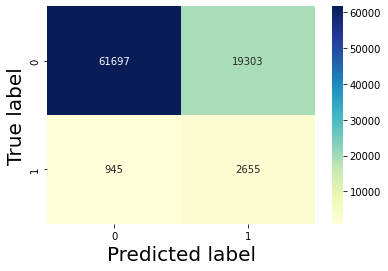

In [31]:
#Let's try giving more weight to class label 1

w = {0:4, 1:90}
logreg_w = LogisticRegression(max_iter=1000,class_weight=w)
logreg_w.fit(X_model_train,y_model_train)

# predicting the class label 
y_pred_train = logreg_w.predict(X_model_train)

# predicting the class probability
y_pred_proba_train = logreg_w.predict_proba(X_model_train)[:,1] 

print('AUC Score (Train):', round(metrics.roc_auc_score(y_model_train, y_pred_train) * 100,2),'%')
print(f'Recall: {metrics.recall_score(y_model_train,y_pred_train)}') # very important for imbalanced dataset

# draw the confusion matrix from logistic regression for test set
confusion_matrix = metrics.confusion_matrix(y_model_train, y_pred_train)
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu", fmt="g")
plt.ylabel('True label',fontsize=20)
plt.xlabel('Predicted label',fontsize=20)
plt.show()

## **Optimizing the logistic regression model**

In [32]:
#lets see the different hyperparameters that we have for our logistic regression model
print(logreg)

LogisticRegression(max_iter=1000)


In [33]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [34]:
# optimizing the weight factor
w = [{0:1000,1:100},{0:1000,1:10}, {0:1000,1:1.0}, 
     {0:500,1:1.0}, {0:400,1:1.0}, {0:300,1:1.0}, {0:200,1:1.0}, 
     {0:150,1:1.0}, {0:100,1:1.0}, {0:99,1:1.0}, {0:10,1:1.0}, 
     {0:0.01,1:1.0}, {0:0.01,1:10}, {0:0.01,1:100}, 
     {0:0.001,1:1.0}, {0:0.005,1:1.0}, {0:1.0,1:1.0}, 
     {0:1.0,1:0.1}, {0:10,1:0.1}, {0:100,1:0.1}, 
     {0:10,1:0.01}, {0:1.0,1:0.01}, {0:1.0,1:0.001}, {0:1.0,1:0.005}, 
     {0:1.0,1:10}, {0:1.0,1:99}, {0:1.0,1:100}, {0:1.0,1:150}, 
     {0:1.0,1:200}, {0:1.0,1:300},{0:1.0,1:400},{0:1.0,1:500}, 
     {0:1.0,1:1000}, {0:10,1:1000},{0:100,1:1000} ]

grid = dict(class_weight=w)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)
grid_search = GridSearchCV(estimator=logreg, param_grid=grid, n_jobs=-1, cv=cv, scoring='roc_auc',verbose=True)
grid_result = grid_search.fit(X_model_train, y_model_train)


Fitting 10 folds for each of 35 candidates, totalling 350 fits


In [35]:
# lets print the best AUC score and the corresponding paramater values after grid search for optimal weights
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.816124 using {'class_weight': {0: 1.0, 1: 10}}


AUC Score (Train): 81.77 %
Recall: 0.5219444444444444


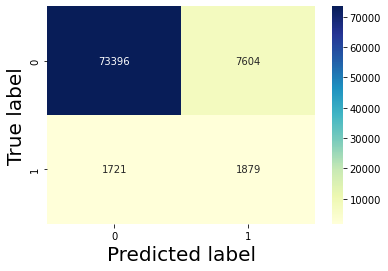

In [36]:
## Let's calculate confusion matrix and recall wih these optimal weights
w = {0:1, 1:10}
logreg_w = LogisticRegression(max_iter=1000,class_weight=w)
logreg_w.fit(X_model_train,y_model_train)

# predicting the class label 
y_pred_train = logreg_w.predict(X_model_train)

# predicting the class probability
y_pred_proba_train = logreg_w.predict_proba(X_model_train)[:,1] 

print('AUC Score (Train):', round(metrics.roc_auc_score(y_model_train, y_pred_proba_train) * 100,2),'%')
print(f'Recall: {metrics.recall_score(y_model_train,y_pred_train)}') # very important for imbalanced dataset

# draw the confusion matrix from logistic regression for test set
confusion_matrix = metrics.confusion_matrix(y_model_train, y_pred_train)
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu", fmt="g")
plt.ylabel('True label',fontsize=20)
plt.xlabel('Predicted label',fontsize=20)
plt.show()

In [37]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

#hyper-parameter values to try in grid search
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

#hyperparam_grid = {"class_weight": w }

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)
grid_search = GridSearchCV(estimator=logreg_w, param_grid=grid, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0,verbose=True)
grid_result = grid_search.fit(X_model_train, y_model_train)

Fitting 10 folds for each of 15 candidates, totalling 150 fits


In [38]:
# lets print the best AUC score and the corresponding paramater values
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.816237 using {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}


AUC Score (Train): 81.77 %
Recall: 0.5233333333333333


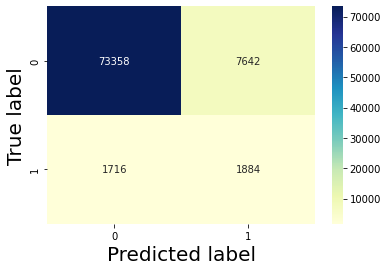

In [39]:
## Let's calculate confusion matrix and recall wih these optimal parameters
w = {0:1, 1:10}
logreg_w = LogisticRegression(max_iter=1000,class_weight=w,C=0.01,penalty='l2',solver='liblinear')
logreg_w.fit(X_model_train,y_model_train)

# predicting the class label 
y_pred_train = logreg_w.predict(X_model_train)

# predicting the class probability
y_pred_proba_train = logreg_w.predict_proba(X_model_train)[:,1] 

print('AUC Score (Train):', round(metrics.roc_auc_score(y_model_train, y_pred_proba_train) * 100,2),'%')
print(f'Recall: {metrics.recall_score(y_model_train,y_pred_train)}') # very important for imbalanced dataset

# draw the confusion matrix from logistic regression for train set
confusion_matrix = metrics.confusion_matrix(y_model_train, y_pred_train)
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu", fmt="g")
plt.ylabel('True label',fontsize=20)
plt.xlabel('Predicted label',fontsize=20)
plt.show()

## **Conclusion of Logistic Regressor:**
* The final model is: 
  LogisticRegression(max_iter=1000,class_weight= {0:1, 1:10},C=0.01,penalty='l2',solver='liblinear')
* AUC score is 81.77%
* Recall score is 52.33%
* Still the model only predicts the class 1 correctly 52.33% times

In [40]:
## predicting on the validation dataset
## splitting df_valid into x and y
X_valid=df_valid.drop('default',axis=1)
y_valid=df_valid['default']

# replacing the missing values
iter_testl=0
for i in col_x:
    #median_x_list.append(X_model_train[X_model_train[i]!=0][i].median()) 
    X_valid.loc[X_valid[i]==0, i] = median_x_list[iter_testl]
    iter_testl=iter_testl+1
    
# performing the robust scaler
X_valid = robust_scale.fit_transform(X_valid)
X_valid  = pd.DataFrame(X_valid)

AUC Score (Train): 82.21 %
Recall: 0.5006666666666667


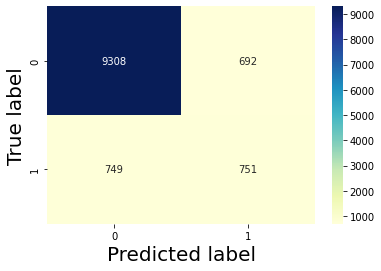

In [41]:
# predicting the probabilities , checking the AUC score and saving the probabilities in results1.csv
# predicting the class label 
y_pred_valid = logreg_w.predict(X_valid)

# predicting the class probability
y_pred_proba_valid = logreg_w.predict_proba(X_valid)[:,1] 

print('AUC Score (Train):', round(metrics.roc_auc_score(y_valid, y_pred_proba_valid) * 100,2),'%')
print(f'Recall: {metrics.recall_score(y_valid,y_pred_valid)}') # very important for imbalanced dataset

# draw the confusion matrix from logistic regression for val.csv dataset
confusion_matrix = metrics.confusion_matrix(y_valid, y_pred_valid)
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu", fmt="g")
plt.ylabel('True label',fontsize=20)
plt.xlabel('Predicted label',fontsize=20)
plt.show()

In [42]:
# saving the results to result1.csv
np.savetxt('results1.csv', y_pred_proba_valid, delimiter=',')

## **Logistic Regression final results from the val.csv file**
* AUC score is 82.21%
* Recall is 50%
* Around 50% of times we predict the class 1 label correctly

## Balancing the dataset by undersampling 


In [43]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

In [44]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_val_score
from numpy import mean


In [45]:
#logistic regression with default parameters
model = LogisticRegression()
#over = SMOTE(sampling_strategy=0.1)

#under sampling the majority class
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)


In [46]:
#cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
#scores = cross_val_score(pipeline, X_model_train, y_model_train, scoring='roc_auc', cv=cv, n_jobs=-1)
X_res_train, y_res_train = under.fit_resample(X_model_train, y_model_train)
#print('Mean ROC AUC: %.3f' % mean(scores))

In [47]:
from collections import Counter

In [48]:
print('Resampled dataset shape %s' % Counter(y_res_train))

Resampled dataset shape Counter({0: 7200, 1: 3600})


In [49]:
w = {0:1,1:2}
model = LogisticRegression(max_iter=1000,class_weight=w,C=0.01,penalty='l2',solver='liblinear')

In [50]:
print('Resampled dataset shape %s' % Counter(y_res_train))

Resampled dataset shape Counter({0: 7200, 1: 3600})


AUC Score (Train): 81.61 %
Recall: 0.7433333333333333


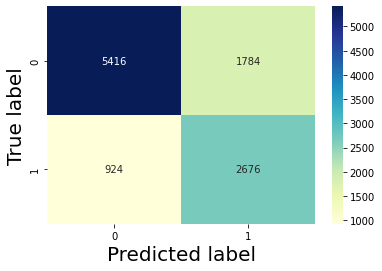

In [51]:
model.fit(X_res_train,y_res_train)


# predicting the class label 
y_pred_train = model.predict(X_res_train)

# predicting the class probability
y_pred_proba_train = model.predict_proba(X_res_train)[:,1] 

print('AUC Score (Train):', round(metrics.roc_auc_score(y_res_train, y_pred_proba_train) * 100,2),'%')
print(f'Recall: {metrics.recall_score(y_res_train,y_pred_train)}') # very important for imbalanced dataset

# draw the confusion matrix from logistic regression for train set
confusion_matrix = metrics.confusion_matrix(y_res_train, y_pred_train)
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu", fmt="g")
plt.ylabel('True label',fontsize=20)
plt.xlabel('Predicted label',fontsize=20)
plt.show()

AUC Score (Train): 81.17 %
Recall: 0.735


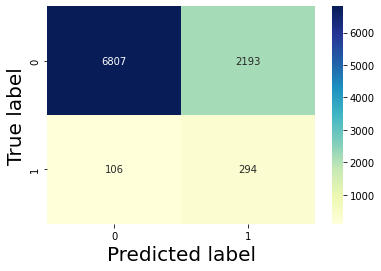

In [52]:
# predicting the class label 
y_pred_test = model.predict(X_model_test)

# predicting the class probability
y_pred_proba_test = model.predict_proba(X_model_test)[:,1] 

print('AUC Score (Train):', round(metrics.roc_auc_score(y_model_test, y_pred_proba_test) * 100,2),'%')
print(f'Recall: {metrics.recall_score(y_model_test,y_pred_test)}') # very important for imbalanced dataset

# draw the confusion matrix from logistic regression for train set
confusion_matrix = metrics.confusion_matrix(y_model_test, y_pred_test)
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu", fmt="g")
plt.ylabel('True label',fontsize=20)
plt.xlabel('Predicted label',fontsize=20)
plt.show()

## Trying the SMOTE
## will SMOTE help ?

### first do oversampling of minority class
### then do undersampling of majority class

In [53]:
over = SMOTE(sampling_strategy=0.1)

In [54]:
X_res_train, y_res_train = over.fit_resample(X_model_train, y_model_train)


In [55]:
Counter(y_res_train)

Counter({0: 81000, 1: 8100})

In [56]:
X_res_train1, y_res_train1 = under.fit_resample(X_res_train, y_res_train)


In [57]:
Counter(y_res_train1)

Counter({0: 16200, 1: 8100})

AUC Score (Train): 81.9 %
Recall: 0.7408641975308642


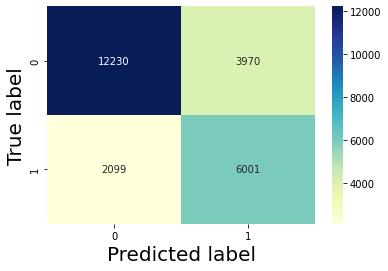

In [58]:
model.fit(X_res_train1,y_res_train1)


# predicting the class label 
y_pred_train = model.predict(X_res_train1)

# predicting the class probability
y_pred_proba_train = model.predict_proba(X_res_train1)[:,1] 

print('AUC Score (Train):', round(metrics.roc_auc_score(y_res_train1, y_pred_proba_train) * 100,2),'%')
print(f'Recall: {metrics.recall_score(y_res_train1,y_pred_train)}') # very important for imbalanced dataset

# draw the confusion matrix from logistic regression for train set
confusion_matrix = metrics.confusion_matrix(y_res_train1, y_pred_train)
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu", fmt="g")
plt.ylabel('True label',fontsize=20)
plt.xlabel('Predicted label',fontsize=20)
plt.show()



AUC Score (Train): 81.16 %
Recall: 0.735


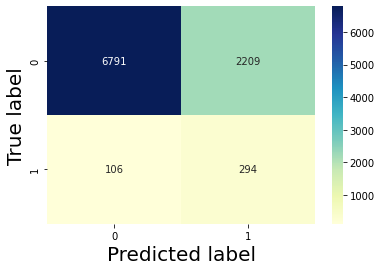

In [59]:
# predicting the class label 
y_pred_test = model.predict(X_model_test)

# predicting the class probability
y_pred_proba_test = model.predict_proba(X_model_test)[:,1] 

print('AUC Score (Train):', round(metrics.roc_auc_score(y_model_test, y_pred_proba_test) * 100,2),'%')
print(f'Recall: {metrics.recall_score(y_model_test,y_pred_test)}') # very important for imbalanced dataset

# draw the confusion matrix from logistic regression for train set
confusion_matrix = metrics.confusion_matrix(y_model_test, y_pred_test)
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu", fmt="g")
plt.ylabel('True label',fontsize=20)
plt.xlabel('Predicted label',fontsize=20)
plt.show()

In [60]:
metrics.precision_score(y_model_test,y_pred_test)

0.11745904914103077

## **2) Decision Tree**


In [61]:
# Import DecisionTree Classifier
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTree Classifier with default parameter values
dtree = DecisionTreeClassifier()

# Fit dtree to the train set
dtree.fit(X_res_train1,y_res_train1)


DecisionTreeClassifier()

AUC Score (Train): 100.0 %
Recall: 1.0


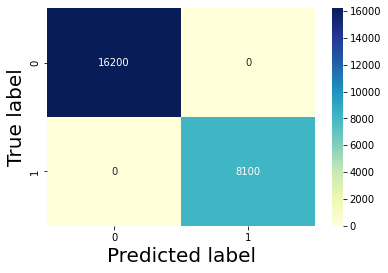

In [62]:
# Use dtree to predict instances from the train_set

# perdicting the class label 
y_pred_train_dtree = dtree.predict(X_res_train1)

# to check what column correspond to which class use dtree.classses_
# predcting the class probabilities and keeping it only for class label 1 i.e. customer 'default' in our case
y_pred_proba_train_dtree = dtree.predict_proba(X_res_train1)[:,1] 

print('AUC Score (Train):', round(metrics.roc_auc_score(y_res_train1, y_pred_proba_train_dtree) * 100,2),'%')
print(f'Recall: {metrics.recall_score(y_res_train1,y_pred_train_dtree)}') # very important for imbalanced dataset

# draw the confusion matrix from decision tree for train set
confusion_matrix_dtree = metrics.confusion_matrix(y_res_train1, y_pred_train_dtree)
sns.heatmap(pd.DataFrame(confusion_matrix_dtree), annot=True, cmap="YlGnBu", fmt="g")
plt.ylabel('True label',fontsize=20)
plt.xlabel('Predicted label',fontsize=20)
plt.show()

AUC Score (Test): 63.93 %
Recall: 0.465


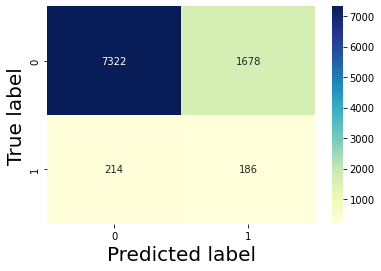

In [63]:
# Use dtree to predict instances from the train_set

# perdicting the class label 
y_pred_test_dtree = dtree.predict(X_model_test)

# to check what column correspond to which class use dtree.classses_
# predcting the class probabilities and keeping it only for class label 1 i.e. customer 'default' in our case
y_pred_proba_test_dtree = dtree.predict_proba(X_model_test)[:,1] 

print('AUC Score (Test):', round(metrics.roc_auc_score(y_model_test, y_pred_proba_test_dtree) * 100,2),'%')
print(f'Recall: {metrics.recall_score(y_model_test,y_pred_test_dtree)}') # very important for imbalanced dataset

# draw the confusion matrix from decision tree for test set
confusion_matrix_dtree = metrics.confusion_matrix(y_model_test, y_pred_test_dtree)
sns.heatmap(pd.DataFrame(confusion_matrix_dtree), annot=True, cmap="YlGnBu", fmt="g")
plt.ylabel('True label',fontsize=20)
plt.xlabel('Predicted label',fontsize=20)
plt.show()

### poor performance for class label 1  (test)
* out of total 400 class label 1 only 62 i.e. 15% are correctly identified

## **Hyper-parameter tuning for decision tree classifier**

In [64]:
dt = DecisionTreeClassifier(random_state=42)
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 4, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

# Instantiate the grid search model
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)

grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=cv, n_jobs=-1, 
                           verbose=1, 
                           scoring = "roc_auc")

grid_search.fit(X_res_train1, y_res_train1)


Fitting 10 folds for each of 60 candidates, totalling 600 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=2, n_splits=5, random_state=1),
             estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='roc_auc', verbose=1)

In [65]:
print("Tuned Paramerers ==> ",grid_search.best_params_)
print("Best Score ==> ",grid_search.best_score_)
print("Accuracy on Train set ==> ", grid_search.score(X_res_train1,y_res_train1))
print("Accuracy on Test set ==> ", grid_search.score(X_model_test,y_model_test))


Tuned Paramerers ==>  {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 50}
Best Score ==>  0.8177268327998781
Accuracy on Train set ==>  0.8894448292943148
Accuracy on Test set ==>  0.7777786111111111


In [66]:
# Instantiate a DecisionTree Classifier with tuned parameter values
dtree1 = DecisionTreeClassifier(criterion= 'gini', 
                               max_depth = 20, 
                               min_samples_leaf = 50)

# Fit dtree1 to the train set
dtree1.fit(X_res_train1,y_res_train1)

DecisionTreeClassifier(max_depth=20, min_samples_leaf=50)

AUC Score (Train): 88.95 %
Recall: 0.6748148148148149


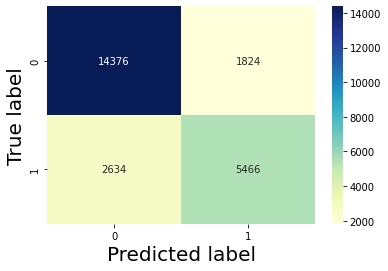

In [67]:
# Use dtree to predict instances from the train_set

# perdicting the class label 
y_pred_train_dtree1 = dtree1.predict(X_res_train1)

# to check what column correspond to which class use dtree.classses_
# predcting the class probabilities and keeping it only for class label 1 i.e. customer 'default' in our case
y_pred_proba_train_dtree1 = dtree1.predict_proba(X_res_train1)[:,1] 

print('AUC Score (Train):', round(metrics.roc_auc_score(y_res_train1, y_pred_proba_train_dtree1) * 100,2),'%')
print(f'Recall: {metrics.recall_score(y_res_train1,y_pred_train_dtree1)}') # very important for imbalanced dataset

# draw the confusion matrix from logistic regression for test set
confusion_matrix_dtree1 = metrics.confusion_matrix(y_res_train1, y_pred_train_dtree1)
sns.heatmap(pd.DataFrame(confusion_matrix_dtree1), annot=True, cmap="YlGnBu", fmt="g")
plt.ylabel('True label',fontsize=20)
plt.xlabel('Predicted label',fontsize=20)
plt.show()

AUC Score (Test): 77.87 %
Recall: 0.5425


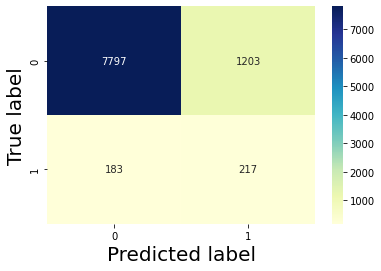

In [68]:
# Use dtree to predict instances from the train_set

# perdicting the class label 
y_pred_test_dtree1 = dtree1.predict(X_model_test)

# to check what column correspond to which class use dtree.classses_
# predcting the class probabilities and keeping it only for class label 1 i.e. customer 'default' in our case
y_pred_proba_test_dtree1 = dtree1.predict_proba(X_model_test)[:,1] 

print('AUC Score (Test):', round(metrics.roc_auc_score(y_model_test, y_pred_proba_test_dtree1) * 100,2),'%')
print(f'Recall: {metrics.recall_score(y_model_test,y_pred_test_dtree1)}') # very important for imbalanced dataset

# draw the confusion matrix from logistic regression for test set
confusion_matrix_dtree1 = metrics.confusion_matrix(y_model_test, y_pred_test_dtree1)
sns.heatmap(pd.DataFrame(confusion_matrix_dtree1), annot=True, cmap="YlGnBu", fmt="g")
plt.ylabel('True label',fontsize=20)
plt.xlabel('Predicted label',fontsize=20)
plt.show()

In [69]:
## plotting the train and test roc curve
fpr_train_dtree1, tpr_train_dtree1, thresholds_train_dtree1 = metrics.roc_curve(y_res_train1, y_pred_proba_train_dtree1)
fpr_test_dtree1, tpr_test_dtree1, thresholds_test_dtree1 = metrics.roc_curve(y_model_test, y_pred_proba_test_dtree1)

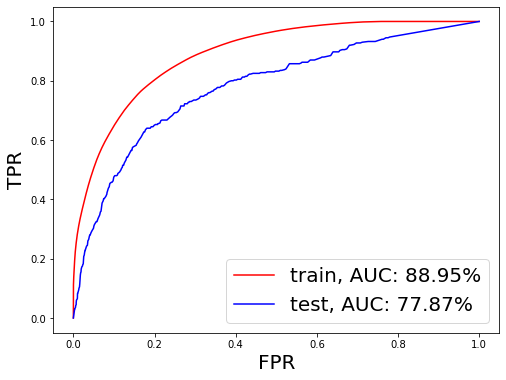

In [70]:
ts_label_dtree1 = round(metrics.roc_auc_score(y_model_test, y_pred_proba_test_dtree1) * 100,2)
tr_label_dtree1 = round(metrics.roc_auc_score(y_res_train1, y_pred_proba_train_dtree1) * 100,2)

fig,ax = plt.subplots(figsize=(8,6))
plt.plot(fpr_train_dtree1,tpr_train_dtree1,color='red',label='train, AUC: '+str(tr_label_dtree1)+'%')
plt.plot(fpr_test_dtree1,tpr_test_dtree1,color='blue',label='test, AUC: '+str(ts_label_dtree1)+'%')
plt.xlabel('FPR', fontsize=20)
plt.ylabel('TPR', fontsize=20)
plt.legend( fontsize=20)
plt.show()


AUC Score (Train): 73.92 %
Recall: 0.5606666666666666


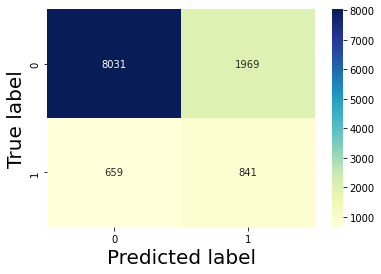

In [71]:
# predicting the probabilities , checking the AUC score and saving the probabilities in results2.csv
# predicting the class label 
y_pred_valid_dtree1 = dtree1.predict(X_valid)

# predicting the class probability
y_pred_proba_valid_dtree1 = dtree1.predict_proba(X_valid)[:,1] 

print('AUC Score (Train):', round(metrics.roc_auc_score(y_valid, y_pred_proba_valid_dtree1) * 100,2),'%')
print(f'Recall: {metrics.recall_score(y_valid,y_pred_valid_dtree1)}') # very important for imbalanced dataset

# draw the confusion matrix from logistic regression for val.csv dataset
confusion_matrix_dtree1 = metrics.confusion_matrix(y_valid, y_pred_valid_dtree1)
sns.heatmap(pd.DataFrame(confusion_matrix_dtree1), annot=True, cmap="YlGnBu", fmt="g")
plt.ylabel('True label',fontsize=20)
plt.xlabel('Predicted label',fontsize=20)
plt.show()

In [72]:
dt_best = grid_search.best_estimator_

In [73]:
from sklearn.metrics import classification_report

In [74]:
#print f1-score, recall, precision of the model
print(classification_report(y_model_test, dt_best.predict(X_model_test)))

print(classification_report(y_valid, dt_best.predict(X_valid)))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92      9000
           1       0.15      0.54      0.24       400

    accuracy                           0.85      9400
   macro avg       0.56      0.70      0.58      9400
weighted avg       0.94      0.85      0.89      9400

              precision    recall  f1-score   support

           0       0.92      0.80      0.86     10000
           1       0.30      0.56      0.39      1500

    accuracy                           0.77     11500
   macro avg       0.61      0.68      0.62     11500
weighted avg       0.84      0.77      0.80     11500



In [75]:
# saving the results to result2.csv
np.savetxt('results2.csv', y_pred_proba_valid_dtree1, delimiter=',')

## **Conclusion of Decision Tree classifier:**
* The final model is: 

  DecisionTreeClassifier(criterion= 'gini', max_depth = 5, min_samples_leaf = 100)
* AUC score is 79.68%

## **3) RandomForest Classifier**

In [76]:
#loading RandomForestClassifier from sklearn
from sklearn.ensemble import RandomForestClassifier
# Instantiate a RandomForestClassifier classifier with default parameter values
rfc = RandomForestClassifier() 
# Fit rfc to the train set
rfc.fit(X_res_train1, y_res_train1) 

RandomForestClassifier()

In [77]:
# predicting the probabilities , checking the AUC score and saving the probabilities in results2.csv
print("\nModel Report")
# predicting the class label for test set
y_preds_test_rf = rfc.predict(X_model_test)
# predicting the class probability for test set
y_pred_proba_test_rf = rfc.predict_proba(X_model_test)[:,1]

# predicting the class label for train set
y_preds_train_rf = rfc.predict(X_res_train1)
# predicting the class probability for train set
y_pred_proba_train_rf = rfc.predict_proba(X_res_train1)[:,1]

print('AUC Score (Train):', round(metrics.roc_auc_score(y_res_train1, y_pred_proba_train_rf) * 100,2),'%')
print('AUC Score (Test):', round(metrics.roc_auc_score(y_model_test, y_pred_proba_test_rf) * 100,2),'%')


Model Report
AUC Score (Train): 100.0 %
AUC Score (Test): 81.63 %


AUC Score (val.csv): 82.4 %
Recall: 0.478


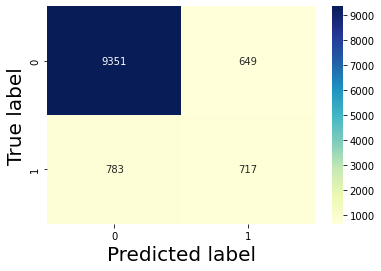

In [78]:
# predicting the class label for train set
y_preds_valid_rf = rfc.predict(X_valid)
# predicting the class probability for train set
y_pred_proba_valid_rf = rfc.predict_proba(X_valid)[:,1]

print('AUC Score (val.csv):', round(metrics.roc_auc_score(y_valid, y_pred_proba_valid_rf) * 100,2),'%')
print(f'Recall: {metrics.recall_score(y_valid,y_preds_valid_rf)}') # very important for imbalanced dataset

# draw the confusion matrix from classifier for val.csv dataset
confusion_matrix_rf = metrics.confusion_matrix(y_valid, y_preds_valid_rf)
sns.heatmap(pd.DataFrame(confusion_matrix_rf), annot=True, cmap="YlGnBu", fmt="g")
plt.ylabel('True label',fontsize=20)
plt.xlabel('Predicted label',fontsize=20)
plt.show()

## 4) XGBOOST

In [79]:
#loading XGBClassifier 
import xgboost as xgb
from xgboost.sklearn import XGBClassifier 

# Instantiate a XGBClassifier classifier with random parameter values
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=100,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27,
 use_label_encoder=False,  
 eval_metric='auc')

# Fit xgb1 to the train set
xgb1.fit(X_res_train1, 
          y_res_train1)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=4, nthread=4, num_parallel_tree=1, predictor='auto',
              random_state=27, reg_alpha=0, ...)

In [80]:
print("\nModel Report")
# predicting the class label for test set
y_preds_test_xgb = xgb1.predict(X_model_test)
# predicting the class probability for test set
y_pred_proba_test_xgb = xgb1.predict_proba(X_model_test)[:,1]

# predicting the class label for train set
y_preds_train_xgb = xgb1.predict(X_res_train1)
# predicting the class probability for train set
y_pred_proba_train_xgb = xgb1.predict_proba(X_res_train1)[:,1]

print('AUC Score (Train):', round(metrics.roc_auc_score(y_res_train1, y_pred_proba_train_xgb) * 100,2),'%')
print('AUC Score (Test):', round(metrics.roc_auc_score(y_model_test, y_pred_proba_test_xgb) * 100,2),'%')


Model Report
AUC Score (Train): 94.21 %
AUC Score (Test): 81.86 %


AUC Score (val.csv): 79.74 %
Recall: 0.4806666666666667


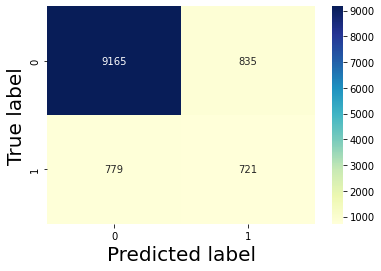

In [81]:
# predicting the class label for train set
y_preds_valid_xgb = xgb1.predict(X_valid)
# predicting the class probability for train set
y_pred_proba_valid_xgb = xgb1.predict_proba(X_valid)[:,1]

print('AUC Score (val.csv):', round(metrics.roc_auc_score(y_valid, y_pred_proba_valid_xgb) * 100,2),'%')
print(f'Recall: {metrics.recall_score(y_valid,y_preds_valid_xgb)}') # very important for imbalanced dataset

# draw the confusion matrix from classifier for val.csv dataset
confusion_matrix_xgb = metrics.confusion_matrix(y_valid, y_preds_valid_xgb)
sns.heatmap(pd.DataFrame(confusion_matrix_xgb), annot=True, cmap="YlGnBu", fmt="g")
plt.ylabel('True label',fontsize=20)
plt.xlabel('Predicted label',fontsize=20)
plt.show()